# Chapter 5.3~ 次元削減2

In [166]:
from IPython.display import Image
%matplotlib inline

Wineデータをダウンロードして、少し表示してみる

In [181]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
num_classes = 13
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


データの標準化を行う

In [169]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import StandardScaler
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

# X(features): [[14.23, 1.71, 2.43, ...], ...]
# y(labels): [1, 1, ...]
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 訓練データ70%, テストデータ30%に分離する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

カーネルPCA用の関数を定義

In [170]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.linalg.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

データをplotする関数の定義

In [215]:
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def wine_plot3d(x, y, title="", plt=plt):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], color='red', marker='o', alpha=0.5)
    ax.scatter(x[y == 2, 0], x[y == 2, 1], x[y == 2, 2], color='blue', marker='o', alpha=0.5)
    ax.scatter(x[y == 3, 0], x[y == 3, 1], x[y == 3, 2], color='green', marker='o', alpha=0.5)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title(title)
    plt.show()
    
def wine_plot2d(x, y, title=""):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x[y==1, 0], x[y==1, 1], 
            color='red', marker='o', alpha=0.5)
    ax.scatter(x[y==2, 0], x[y==2, 1],
                color='blue', marker='o', alpha=0.5)
    ax.scatter(x[y==3, 0], x[y==3, 1],
                color='green', marker='o', alpha=0.5)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    plt.tight_layout()
    # plt.savefig('./figures/half_moon_3.png', dpi=300)
    plt.title(title)
    plt.show()

# kernel PCA

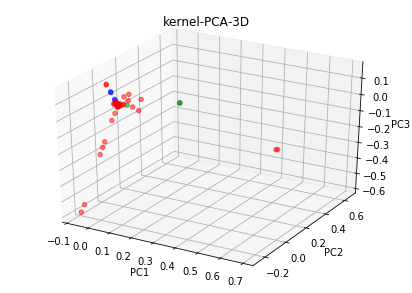

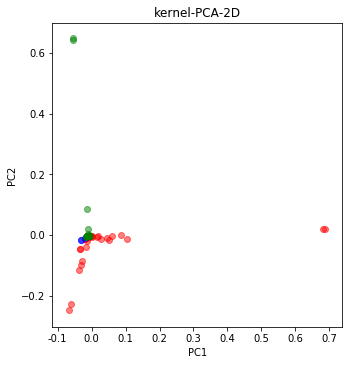

In [216]:
X_kpca3 = rbf_kernel_pca(X_std, gamma=2.3, n_components=3)
X_kpca2 = rbf_kernel_pca(X_std, gamma=2.3, n_components=2)
wine_plot3d(X_kpca3, y, title="kernel-PCA-3D")
wine_plot2d(X_kpca2, y, title="kernel-PCA-2D")

# Locally Linear Embedding(LLE)

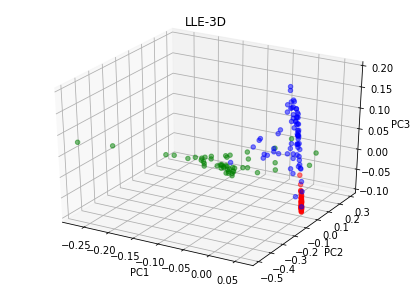

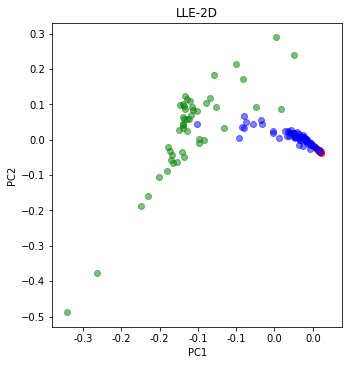

In [217]:
from sklearn.manifold import LocallyLinearEmbedding
LLE3 = LocallyLinearEmbedding(n_components=3)
LLE2 = LocallyLinearEmbedding(n_components=2)
X_lle3 = LLE3.fit_transform(X_std)
X_lle2 = LLE2.fit_transform(X_std)
wine_plot3d(X_lle3, y, title="LLE-3D")
wine_plot2d(X_lle2, y, title="LLE-2D")

LLEで1次元から12次元の各次元へ次元削減してロジスティック回帰で学習・評価

In [218]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression

lle_list = [LocallyLinearEmbedding(n_components=i+1) for i in range(num_classes-1)]

# 1次元〜(num_classes-1)次元まで削減した各々のデータを格納
X_lle_train = [lle_list[i].fit_transform(X_train_std) for i in range(num_classes - 1)]
X_lle_test = [lle_list[i].transform(X_test_std) for i in range(num_classes -1)]

train_score, test_score = [], []
lr = LogisticRegression()
for i in range(num_classes-1):
    lr = lr.fit(X_lle_train[i], y_train)
    train_score.append(lr.score(X_lle_train[i], y_train))
    test_score.append(lr.score(X_lle_test[i], y_test))
    
for i in range(num_classes-1):
    print("dim:{}\tscore:{:.5f}\ttrain_score:{:.5f}".format(i+1, test_score[i], train_score[i]))

dim:1	score:0.64815	train_score:0.66129
dim:2	score:0.96296	train_score:0.91935
dim:3	score:0.98148	train_score:0.92742
dim:4	score:0.98148	train_score:0.93548
dim:5	score:0.98148	train_score:0.93548
dim:6	score:0.98148	train_score:0.93548
dim:7	score:0.98148	train_score:0.93548
dim:8	score:0.98148	train_score:0.93548
dim:9	score:0.98148	train_score:0.93548
dim:10	score:1.00000	train_score:0.93548
dim:11	score:1.00000	train_score:0.94355
dim:12	score:1.00000	train_score:0.94355


# Multi-Dimensional Scaling

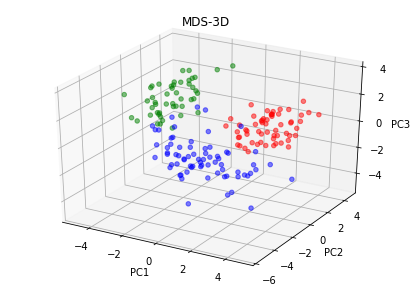

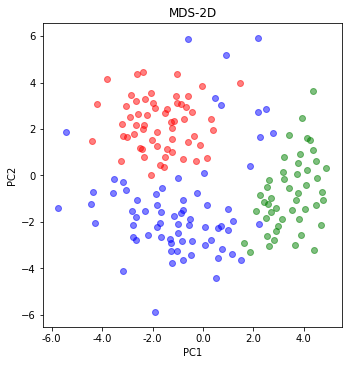

In [219]:
from sklearn.manifold import MDS
MDS3 = MDS(n_components=3)
MDS2 = MDS(n_components=2)
X_mds3 = MDS3.fit_transform(X_std)
X_mds2 = MDS2.fit_transform(X_std)
wine_plot3d(X_mds3, y, title="MDS-3D")
wine_plot2d(X_mds2, y, title="MDS-2D")

MDSはtransformメソッドを持たないため、評価不能

# Isomap

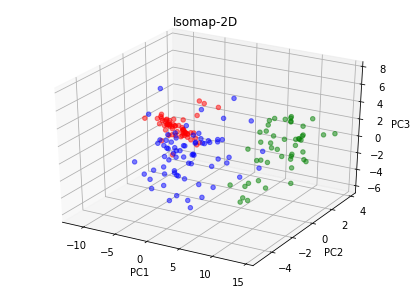

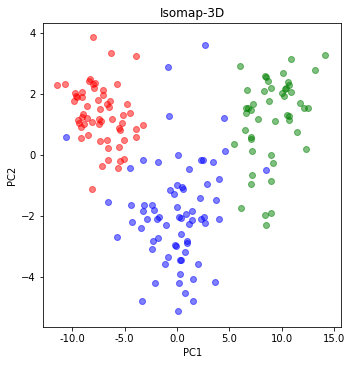

In [220]:
from sklearn.manifold import Isomap
ism3 = Isomap(n_components=3)
ism2 = Isomap(n_components=2)
X_ism3 = ism3.fit_transform(X_std)
X_ism2 = ism2.fit_transform(X_std)
wine_plot3d(X_ism3, y, title="Isomap-2D")
wine_plot2d(X_ism2, y, title="Isomap-3D")

Isomapで1次元から12次元の各次元へ次元削減してロジスティック回帰で学習・評価

In [221]:
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression

ism_list = [Isomap(n_components=i+1) for i in range(num_classes-1)]

# 1次元〜(num_classes-1)次元まで削減した各々のデータを格納
X_ism_train = [ism_list[i].fit_transform(X_train_std) for i in range(num_classes - 1)]
X_ism_test = [ism_list[i].transform(X_test_std) for i in range(num_classes -1)]

train_score, test_score = [], []
for i in range(num_classes-1):
    lr = LogisticRegression()
    lr = lr.fit(X_ism_train[i], y_train)
    train_score.append(lr.score(X_ism_train[i], y_train))
    test_score.append(lr.score(X_ism_test[i], y_test))
    
for i in range(num_classes-1):
    print("dim:{}\tscore:{:.5f}\ttrain_score:{:.5f}".format(i+1, test_score[i], train_score[i]))

dim:1	score:0.90741	train_score:0.92742
dim:2	score:0.92593	train_score:0.90323
dim:3	score:0.96296	train_score:0.93548
dim:4	score:0.96296	train_score:0.93548
dim:5	score:0.96296	train_score:0.93548
dim:6	score:0.94444	train_score:0.93548
dim:7	score:0.94444	train_score:0.96774
dim:8	score:0.94444	train_score:0.95968
dim:9	score:0.94444	train_score:0.95968
dim:10	score:0.94444	train_score:0.95968
dim:11	score:0.92593	train_score:0.95968
dim:12	score:0.94444	train_score:0.95968
